In [3]:
import os
from google.colab import drive
drive.mount('/drive')
base_dir = "/drive/My Drive/Colab Notebooks/animal_dataset/"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

Mounted at /drive


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(100, 50),
batch_size=1)
validation_generator = val_datagen.flow_from_directory(
validation_dir,
target_size=(100, 50),
batch_size=1)

Found 20 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(100, 50, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='sigmoid')(x)
output = layers.Dense(5, activation='softmax')(x)
model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])

In [17]:
history = model.fit_generator(
train_generator,
steps_per_epoch=20,
epochs=1000,
validation_data=validation_generator,
validation_steps=10,
verbose=2,)

Epoch 1/1000
20/20 - 0s - loss: 0.1635 - acc: 0.2000 - val_loss: 0.1627 - val_acc: 0.2000
Epoch 2/1000
20/20 - 0s - loss: 0.1632 - acc: 0.2000 - val_loss: 0.1624 - val_acc: 0.2000
Epoch 3/1000
20/20 - 0s - loss: 0.1628 - acc: 0.2000 - val_loss: 0.1621 - val_acc: 0.2000
Epoch 4/1000
20/20 - 0s - loss: 0.1625 - acc: 0.2000 - val_loss: 0.1618 - val_acc: 0.2000
Epoch 5/1000
20/20 - 0s - loss: 0.1623 - acc: 0.2000 - val_loss: 0.1616 - val_acc: 0.2000
Epoch 6/1000
20/20 - 0s - loss: 0.1620 - acc: 0.2000 - val_loss: 0.1614 - val_acc: 0.2000
Epoch 7/1000
20/20 - 0s - loss: 0.1618 - acc: 0.2000 - val_loss: 0.1612 - val_acc: 0.2000
Epoch 8/1000
20/20 - 0s - loss: 0.1616 - acc: 0.2000 - val_loss: 0.1610 - val_acc: 0.2000
Epoch 9/1000
20/20 - 0s - loss: 0.1614 - acc: 0.2000 - val_loss: 0.1608 - val_acc: 0.2000
Epoch 10/1000
20/20 - 0s - loss: 0.1612 - acc: 0.2000 - val_loss: 0.1606 - val_acc: 0.2000
Epoch 11/1000
20/20 - 0s - loss: 0.1610 - acc: 0.2000 - val_loss: 0.1604 - val_acc: 0.2000
Epoch 12

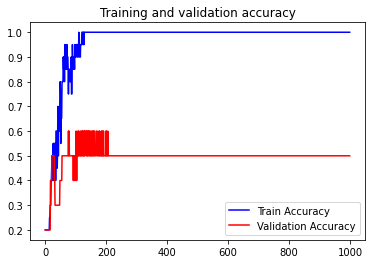

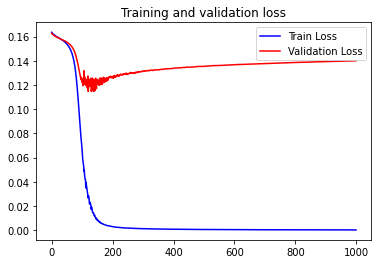

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [21]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img(test_dir+'/data4.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted animal : ", folders[index_preds])

Nilai Output Units:
 [[0.00510677 0.00226888 0.0044671  0.98509246 0.00306478]]

Predicted animal :  elephant
